In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, boxcox
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [4]:
import pandas as pd

url = "https://drive.google.com/uc?id=1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP"
df = pd.read_csv(url)
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.shape

(205, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

In [10]:
duplicate_rows = df[df.duplicated(keep = False)]

In [11]:
duplicate_rows

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [12]:
len(df['CarName'].unique())

147

In [13]:
carnames=[]
for carname in df['CarName']:
    if carname not in carnames:
        carnames.append(carname)
    

In [14]:
carnames

['alfa-romero giulia',
 'alfa-romero stelvio',
 'alfa-romero Quadrifoglio',
 'audi 100 ls',
 'audi 100ls',
 'audi fox',
 'audi 5000',
 'audi 4000',
 'audi 5000s (diesel)',
 'bmw 320i',
 'bmw x1',
 'bmw x3',
 'bmw z4',
 'bmw x4',
 'bmw x5',
 'chevrolet impala',
 'chevrolet monte carlo',
 'chevrolet vega 2300',
 'dodge rampage',
 'dodge challenger se',
 'dodge d200',
 'dodge monaco (sw)',
 'dodge colt hardtop',
 'dodge colt (sw)',
 'dodge coronet custom',
 'dodge dart custom',
 'dodge coronet custom (sw)',
 'honda civic',
 'honda civic cvcc',
 'honda accord cvcc',
 'honda accord lx',
 'honda civic 1500 gl',
 'honda accord',
 'honda civic 1300',
 'honda prelude',
 'honda civic (auto)',
 'isuzu MU-X',
 'isuzu D-Max ',
 'isuzu D-Max V-Cross',
 'jaguar xj',
 'jaguar xf',
 'jaguar xk',
 'maxda rx3',
 'maxda glc deluxe',
 'mazda rx2 coupe',
 'mazda rx-4',
 'mazda glc deluxe',
 'mazda 626',
 'mazda glc',
 'mazda rx-7 gs',
 'mazda glc 4',
 'mazda glc custom l',
 'mazda glc custom',
 'buick elect

In [15]:
df['CarName'] =df['CarName'].replace('audi 100 ls','audi 100ls')



In [16]:
df['CarName'] =df['CarName'].replace('vw rabbit','vokswagen rabbit')

In [17]:
df.drop('car_ID',axis =1 ,inplace = True)

In [18]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [19]:
df.duplicated().sum()

0

In [20]:
df.corr()

ValueError: could not convert string to float: 'alfa-romero giulia'

In [ ]:
df['fueltype'].value_counts()

 value_counts of CarName
CarName
toyota corona       6
toyota corolla      6
peugeot 504         6
subaru dl           4
audi 100ls          3
                   ..
mazda glc 4         1
mazda rx2 coupe     1
maxda glc deluxe    1
maxda rx3           1
volvo 246           1
Name: count, Length: 145, dtype: int64
 value_counts of fueltype
fueltype
gas       185
diesel     20
Name: count, dtype: int64


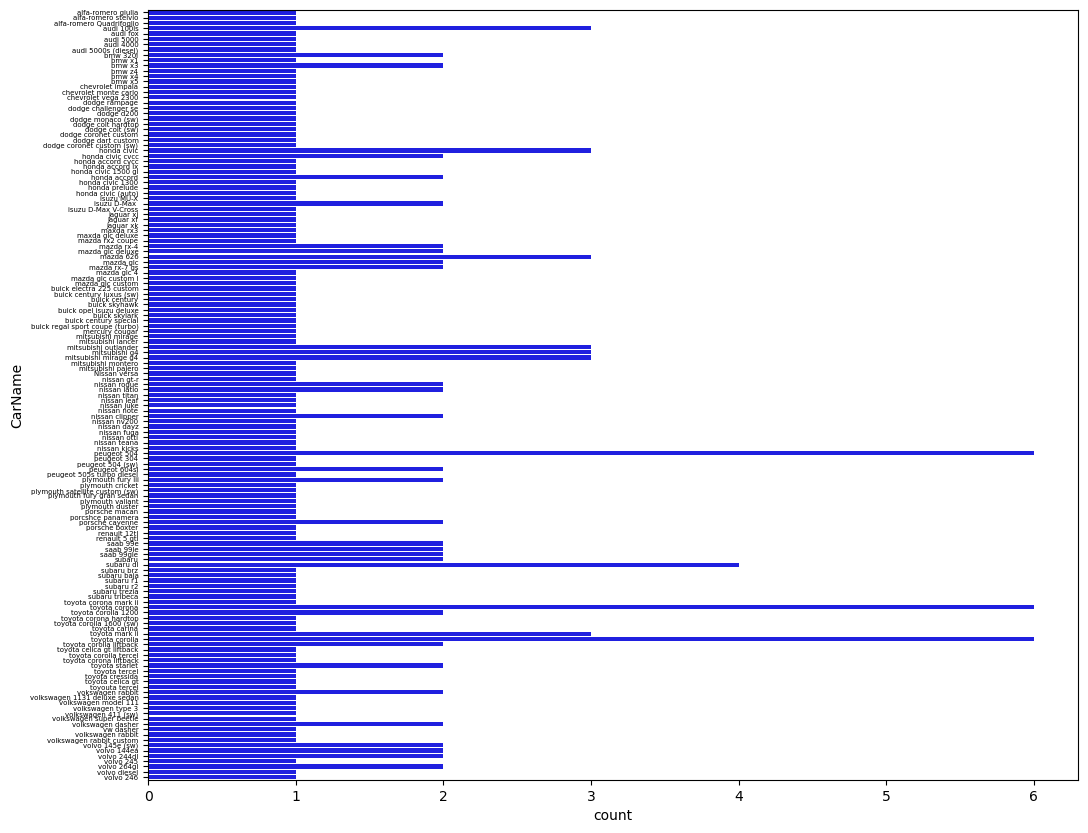

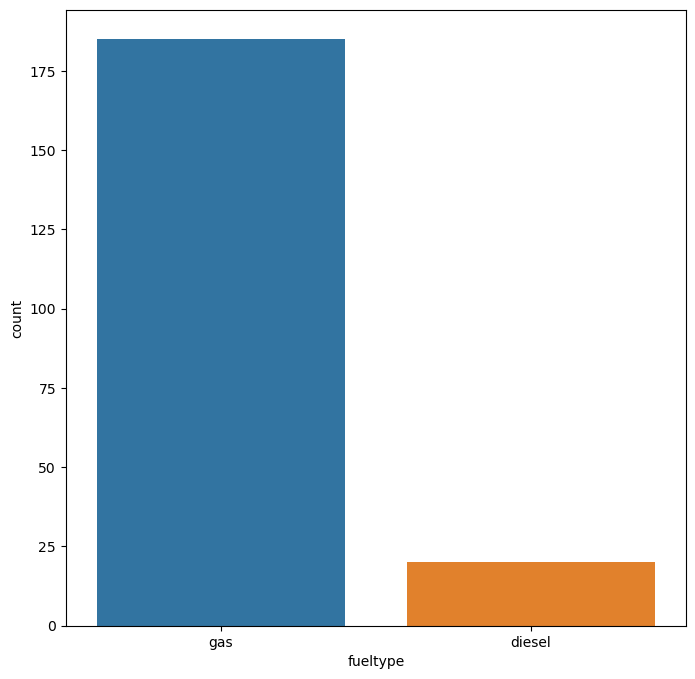

 value_counts of aspiration
aspiration
std      168
turbo     37
Name: count, dtype: int64


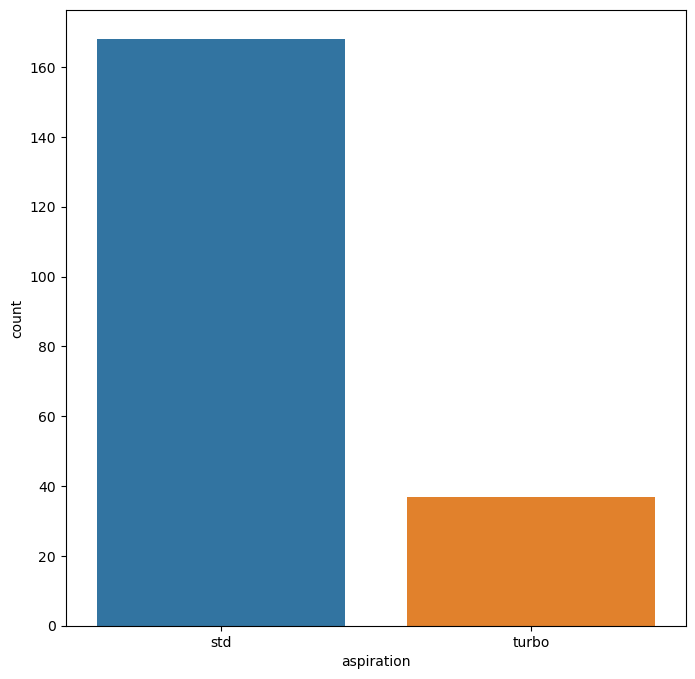

 value_counts of doornumber
doornumber
four    115
two      90
Name: count, dtype: int64


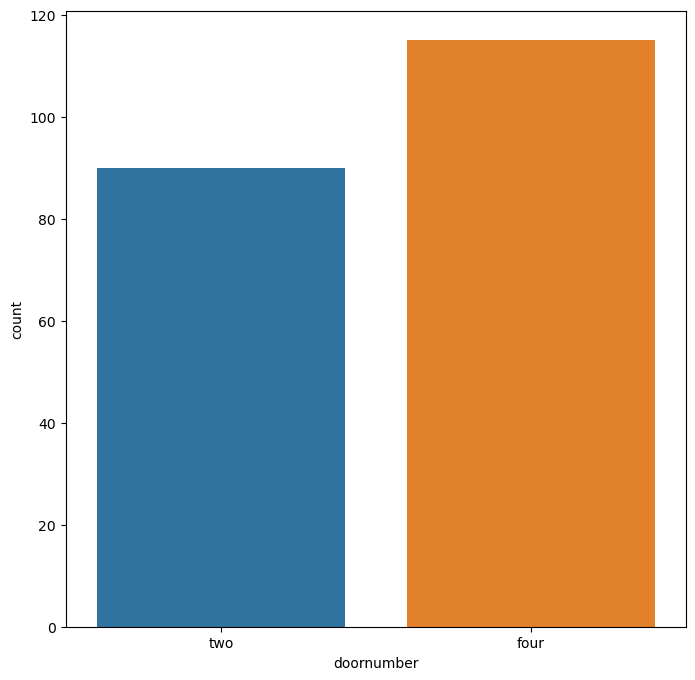

 value_counts of carbody
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64


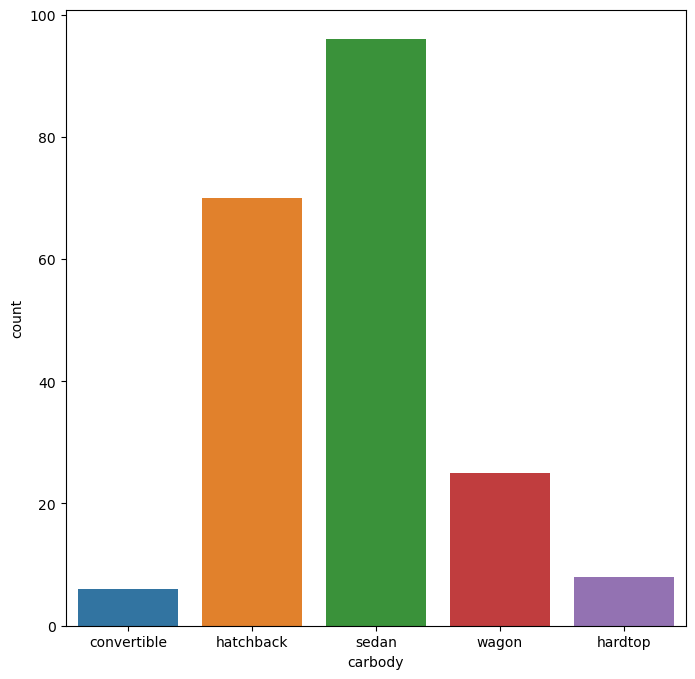

 value_counts of drivewheel
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64


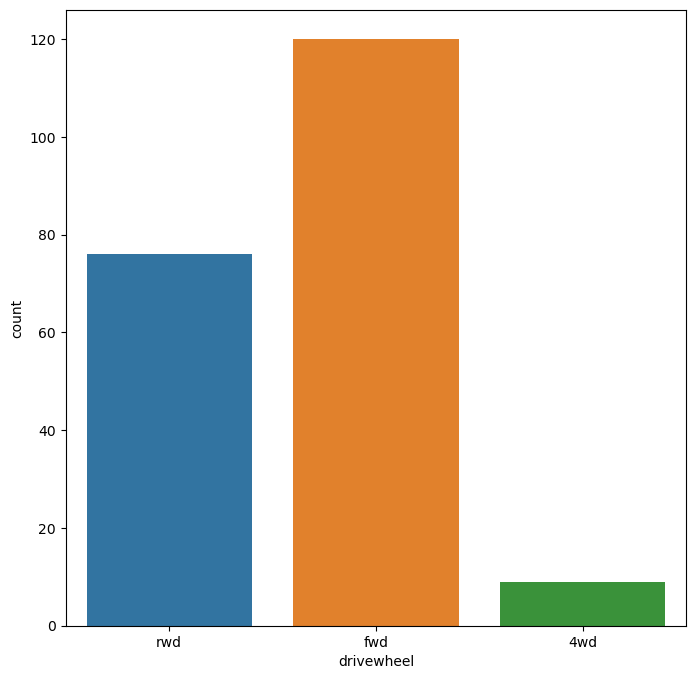

 value_counts of enginelocation
enginelocation
front    202
rear       3
Name: count, dtype: int64


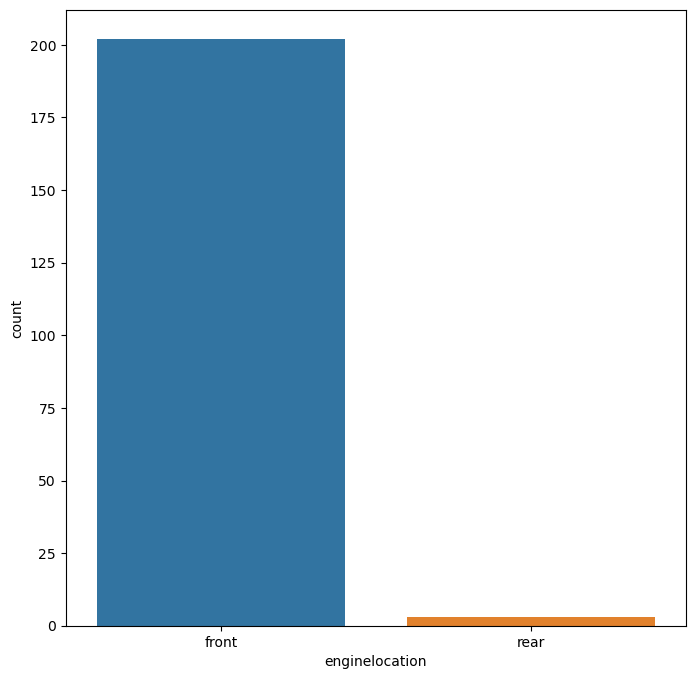

 value_counts of enginetype
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64


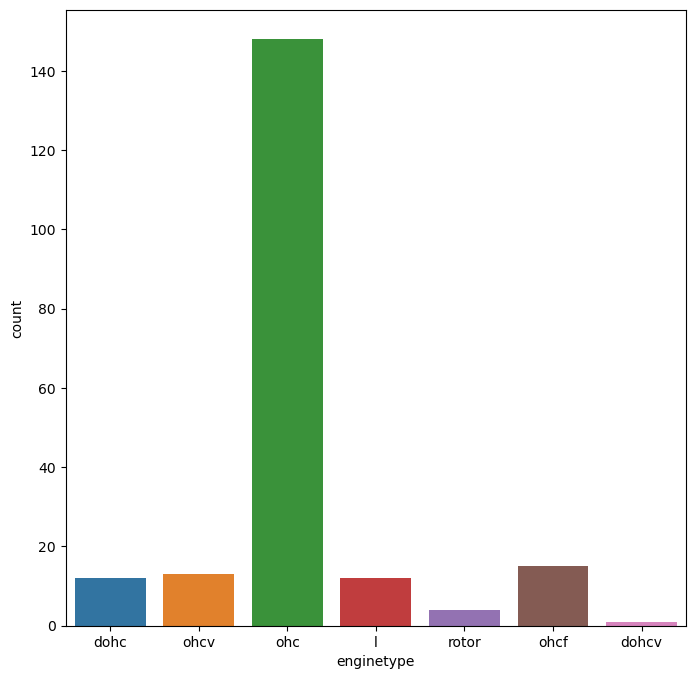

 value_counts of cylindernumber
cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64


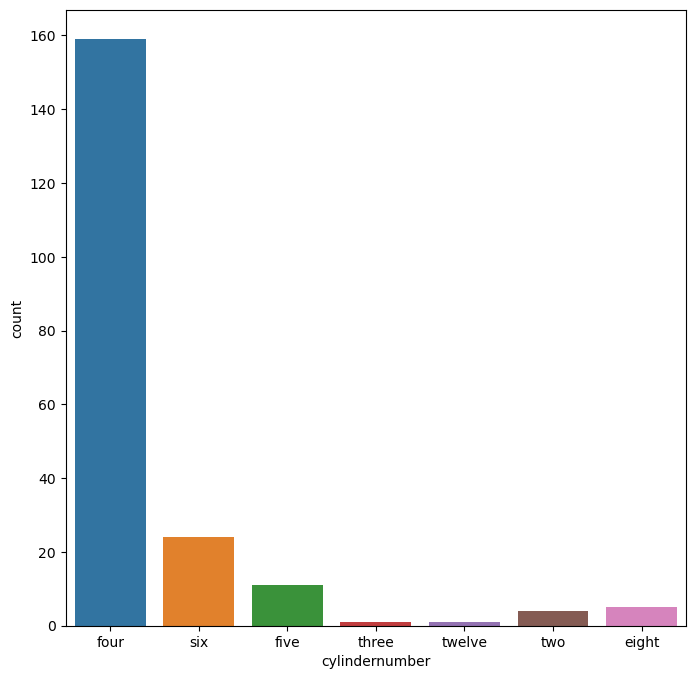

 value_counts of fuelsystem
fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64


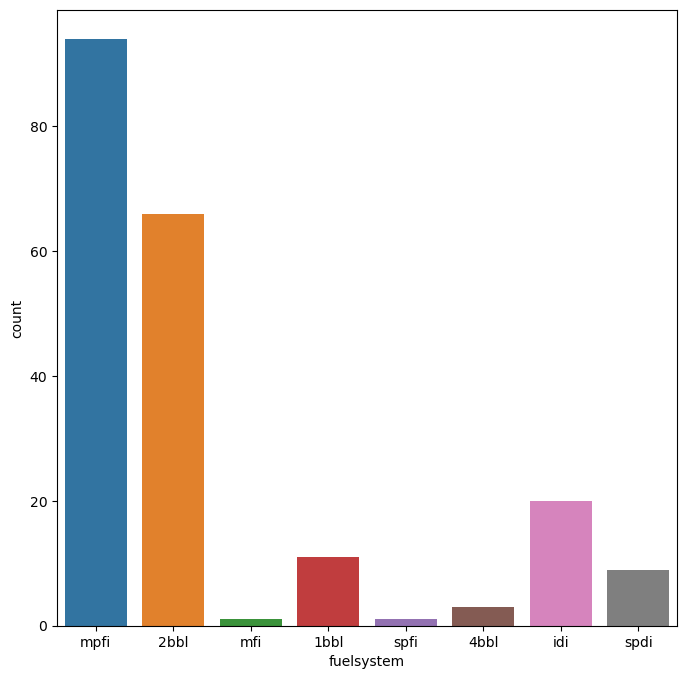

In [21]:
for col in df.columns:
    if df[col].dtype == "object":
        count_df = df[col].value_counts()
        print(f" value_counts of {col}")
        print(df[col].value_counts())
        if df[col].nunique()>10:
            plt.figure(figsize=(12,10))
            sns.countplot(data =df,y=col,color="blue")
            plt.yticks(fontsize =5)
        else:   
            plt.figure(figsize=(8,8))
            sns.countplot(data =df,x=col)
            plt.show()

In [ ]:
df

In [ ]:
"""import pandas as pd
import numpy as np
from scipy import stats

# Sample DataFrame
# df = pd.DataFrame(...)

# Function to identify normally distributed columns
def find_normal_columns(df):
    normal_columns = []
    
    for col in df.select_dtypes(include=[np.number]).columns:  # Select only numeric columns
        stat, p_value = stats.shapiro(df[col].dropna())  # Perform Shapiro-Wilk test
        
        # If p-value is greater than 0.05, we fail to reject the null hypothesis (data is normal)
        if p_value > 0.05:
            normal_columns.append(col)

    return normal_columns

# Find normally distributed columns
normal_cols = find_normal_columns(df)
print("Columns with normally distributed values:", normal_cols)"""


In [22]:


from scipy.stats import skew

In [32]:
norma_dist=[]
not_norm_dist= []
for col in df.select_dtypes(include=[np.number]).columns:
    skewness = skew(df[col])
    if  -0.5< skewness <0.5:
        norma_dist.append(col)
    else:
        not_norm_dist.append(col)
    
    
    

In [33]:
norma_dist

['symboling', 'carlength', 'carheight', 'boreratio', 'peakrpm']

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


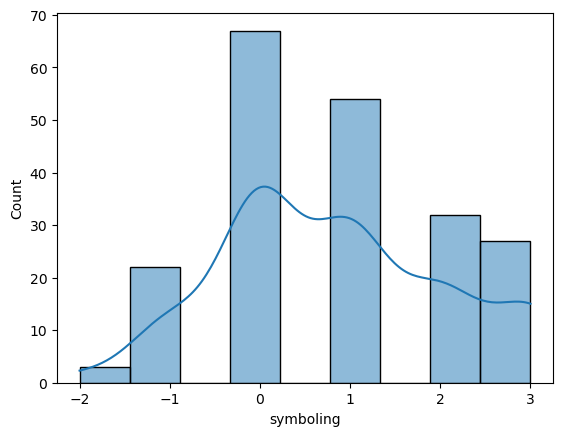

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


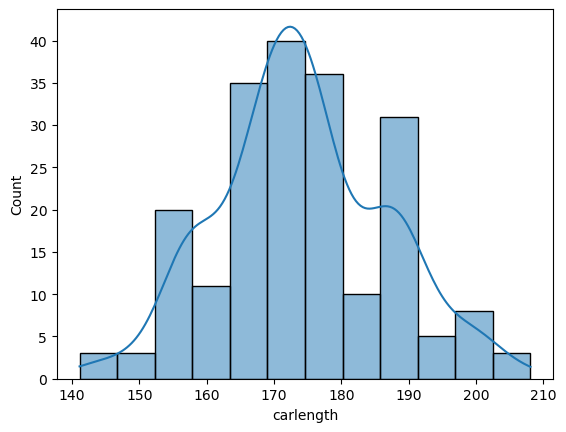

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


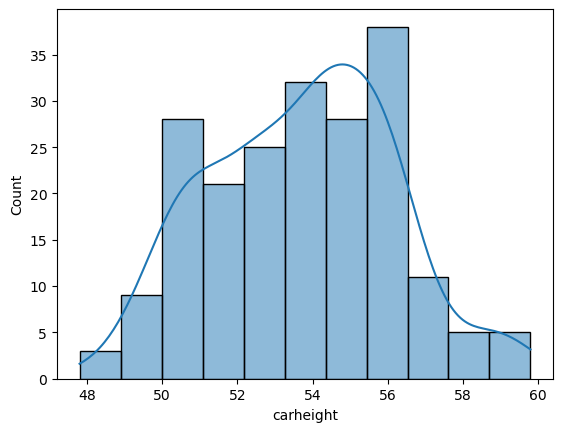

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


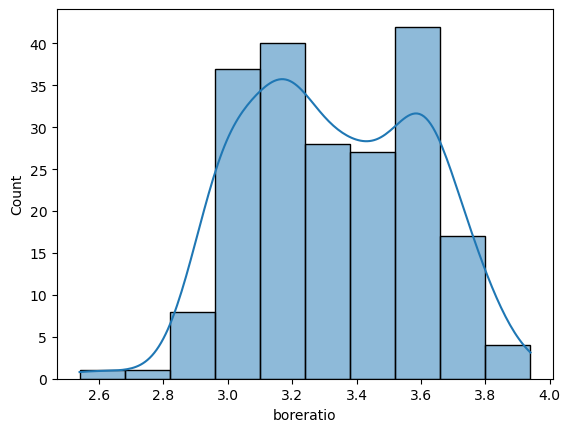

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


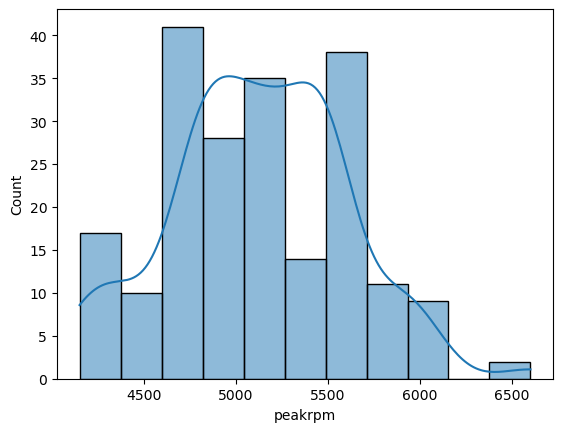

In [34]:
for col in df:
    sns.histplot(x=df[col], kde=True)
    plt.show()

In [31]:
for col in df.select_dtypes(include=[np.number]).columns:
    skewness = skew(df[col])
    print(f'Skewness of {col}: {skewness}')

Skewness of symboling: 0.20952469094997359
Skewness of wheelbase: 1.042513612401581
Skewness of carlength: 0.15481031885453517
Skewness of carwidth: 0.8973753485201392
Skewness of carheight: 0.06265991683394276
Skewness of curbweight: 0.676402180083416
Skewness of enginesize: 1.9333748457840114
Skewness of boreratio: 0.02000863132222015
Skewness of stroke: -0.6846476670384662
Skewness of compressionratio: 2.5917196238579114
Skewness of horsepower: 1.3950064255509182
Skewness of peakrpm: 0.07460765890035755
Skewness of citympg: 0.6588377533622138
Skewness of highwaympg: 0.5360379305163596
Skewness of price: 1.7646442265113236
